# Imports and read data

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [2]:
root_path = "kicking/player_stats_kicking_"
ending = ".csv.gz"
data_list = [root_path + str(2021-i) + ending for i in range(23)]
data_list[0]

'kicking/player_stats_kicking_2021.csv.gz'

In [3]:
# create a list of DFs from data_list using read_csv by mapping, then combine them into 1 DF with concat
df = pd.concat(map(pd.read_csv, data_list))
# reset the index since there are repeats for each season
df.reset_index(drop=True, inplace=True)
print(len(df))
df.tail()

12195


,season,week,season_type,team,player_name,player_id,fg_made,fg_missed,fg_blocked,fg_long,fg_att,fg_pct,pat_made,pat_missed,pat_blocked,pat_att,pat_pct,fg_made_distance,fg_missed_distance,fg_blocked_distance,gwfg_att,gwfg_distance,gwfg_made,gwfg_missed,gwfg_blocked,fg_made_0_19,fg_made_20_29,fg_made_30_39,fg_made_40_49,fg_made_50_59,fg_made_60_,fg_missed_0_19,fg_missed_20_29,fg_missed_30_39,fg_missed_40_49,fg_missed_50_59,fg_missed_60_,fg_made_list,fg_missed_list,fg_blocked_list
12190,1999,20,POST,LA,J.Wilkins,00-0017693,1,1,0,24,2,0.500,0,0,0,0,NaN,24,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,24,44,NaN
12191,1999,20,POST,TB,M.Gramatica,00-0006223,2,0,0,25,2,1.000,0,0,0,0,NaN,48,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,25;23,NaN,NaN
12192,1999,20,POST,TEN,A.Del Greco,00-0004147,1,0,0,34,1,1.000,4,0,0,4,1.0,34,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,34,NaN,NaN
12193,1999,21,POST,LA,J.Wilkins,00-0017693,3,1,0,29,4,0.750,2,0,0,2,1.0,84,34,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,27;29;28,34,NaN
12194,1999,21,POST,TEN,A.Del Greco,00-0004147,1,1,1,43,3,0.333,1,0,0,1,1.0,43,47,47,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,43,47,47.0


# Functions to correct made_fg_list and missed_fg_list: 
currently ["21;27"] - change to [21, 27]

In [4]:
def correct_made_list(made_list):
    if(str(made_list) == "nan"):
        new_list = []
    else:
        split_list = made_list.split(";")
        new_list = [int(x) for x in split_list]
    return(new_list)

In [5]:
def correct_missed_list(missed_list):
    if(str(missed_list) == "nan"):
        new_list = []
    else:
        split_list = missed_list.split(";")
        new_list = [int(x) for x in split_list]
    return(new_list)

In [6]:
df["fg_made_list"] = df["fg_made_list"].apply(correct_made_list)
df["fg_missed_list"] = df["fg_missed_list"].apply(correct_missed_list)

# Function to calculate season average for field goals from all distances

In [7]:
def calculate_basic_average(df):
    made = df["fg_made"].sum()
    missed = df["fg_missed"].sum()
    basic_ave = round(100*made/(made+missed), 1)
    return(basic_ave)

In [8]:
basic_average = calculate_basic_average(df)
print(f"The overall average for field goals was: {basic_average}%")

The overall average for field goals was: 84.1%


# Look at extra point conversion

In [9]:
made_xp = df["pat_made"].sum()
attempted_xp = df["pat_att"].sum()
xp_perc = round(made_xp/attempted_xp, 4)
print(f"From 1999 through 2021 there were {attempted_xp} attempted extra points and {made_xp} were made for a percent of {round(100*xp_perc,2)}%")

From 1999 through 2021 there were 28405 attempted extra points and 27626 were made for a percent of 97.26%


### Before try distance was moved back: 1999 through 2014

In [10]:
old_distance = df[df["season"] < 2015]
old_made_xp = old_distance["pat_made"].sum()
old_attempted_xp = old_distance["pat_att"].sum()
old_xp_perc = round(old_made_xp/old_attempted_xp, 4)
print(f"From 1999 to 2014 there were {old_attempted_xp} attempted extra points and {old_made_xp} were made for a percent of {round(100*old_xp_perc,2)}%")

From 1999 to 2014 there were 19453 attempted extra points and 19230 were made for a percent of 98.85%


### After try distance was moved back: 2015 to current

In [11]:
new_distance = df[df["season"] > 2014]
new_made_xp = new_distance["pat_made"].sum()
new_attempted_xp = new_distance["pat_att"].sum()
new_xp_perc = round(new_made_xp/new_attempted_xp, 4)
print(f"From 2015 to 2021 there were {new_attempted_xp} attempted extra points and {new_made_xp} were made for a percent of {round(100*new_xp_perc,2)}%")

From 2015 to 2021 there were 8952 attempted extra points and 8396 were made for a percent of 93.79%


# Function to collect data for each fg distance

In [12]:
def make_fg_by_yard_dict(df):
    # dictionary to hold [attempts, makes] for each distance tried
    fg_dict = {}
    
    # check each row for made ande missed kicks
    for row in range(len(df)):
        made_list = df.loc[row, "fg_made_list"]
        if(len(made_list) > 0):
            # go through each made kick
            for j in range(len(made_list)):
                try: # increase attmpts and makes
                    fg_dict[int(made_list[j])][0] += 1
                    fg_dict[int(made_list[j])][1] += 1
                except: # create key/value for that kick distance
                    fg_dict[int(made_list[j])] = [1,1]
        
        missed_list = df.loc[row, "fg_missed_list"]
        if(len(missed_list) > 0):
            for j in range(len(missed_list)):
                try:
                    fg_dict[int(missed_list[j])][0] += 1
                except:
                    fg_dict[int(missed_list[j])] = [1,0]
        
    return(fg_dict)                    

### Create dictionary and convert to percent, then sort by yards

In [13]:
data_dict = make_fg_by_yard_dict(df)

In [14]:
fg_perc_dict = {}
for key in data_dict:
    attempts = data_dict[key][0]
    made = data_dict[key][1]
    fg_perc_dict[key] = round(100*made/attempts, 2)

sorted_fg_perc_dict = dict(sorted(fg_perc_dict.items(), key=lambda item: item[0]))
print(f"Number of unique yard kicks: {len(sorted_fg_perc_dict)}") #47

Number of unique yard kicks: 54


### Plot fg accuracy by distance with horizontal line for basic average

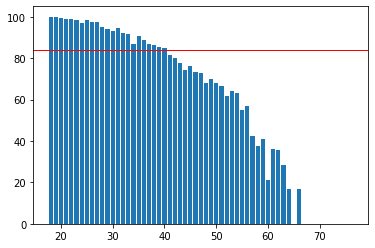

In [15]:
plt.bar(x=list(sorted_fg_perc_dict.keys()), height=list(sorted_fg_perc_dict.values()))
plt.axhline(y=basic_average, linewidth=1, color='r')
None

# Fit make percentage with quadratic regression

In [16]:
keys_list = list(sorted_fg_perc_dict.keys())
values_list = list(sorted_fg_perc_dict.values())

#model polynomial with degree = 2
model = np.poly1d(np.polyfit(keys_list, values_list, 2))
print(model)

          2
-0.03863 x + 1.525 x + 84.09


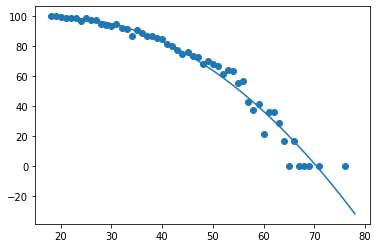

In [17]:
#add fitted polynomial line to scatterplot
polyline = np.linspace(18, 78, 60)
plt.scatter(keys_list, values_list)
plt.plot(polyline, model(polyline))
plt.show()

#### Calcluate r-squared

In [18]:
r_squared = r2_score(values_list, model(keys_list))
round(r_squared, 6)

0.96628

#### Calculate r^2 of overall model vs each individual year

In [19]:
# create list of individual year DataFrames

yearly_df_list = []
for i in range(1999, 2022):
    temp_df = df[df["season"] == i]
    temp_df.reset_index(drop=True, inplace=True)
    yearly_df_list.append(temp_df)

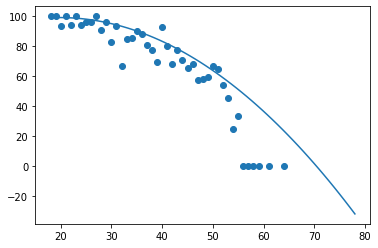

the r^2 of the model for 1999 is: 0.716265




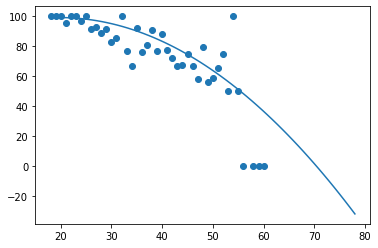

the r^2 of the model for 2000 is: 0.639991




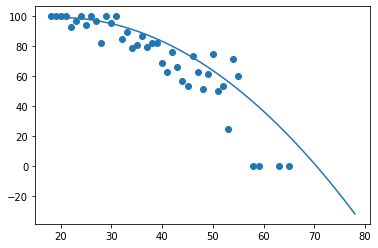

the r^2 of the model for 2001 is: 0.749822




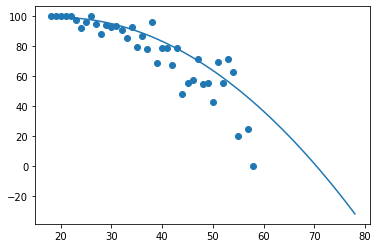

the r^2 of the model for 2002 is: 0.710471




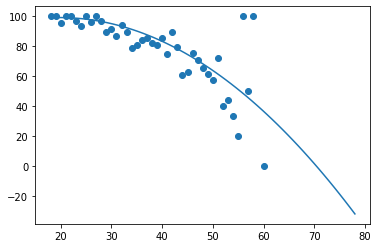

the r^2 of the model for 2003 is: 0.543118




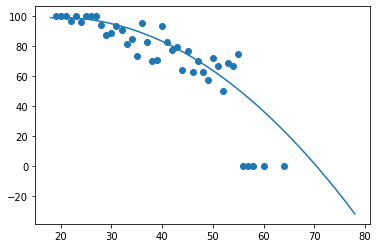

the r^2 of the model for 2004 is: 0.709893




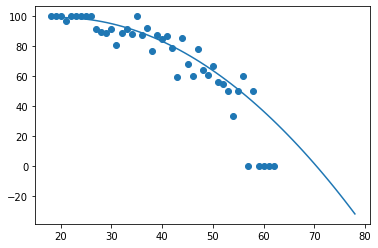

the r^2 of the model for 2005 is: 0.782435




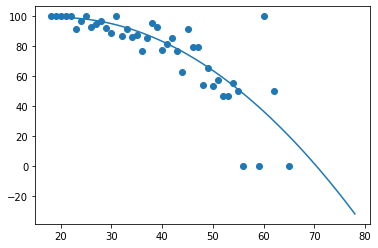

the r^2 of the model for 2006 is: 0.659921




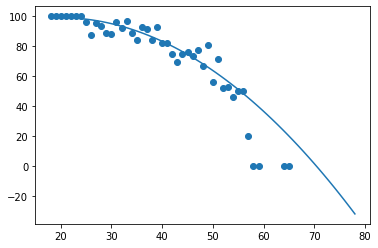

the r^2 of the model for 2007 is: 0.840392




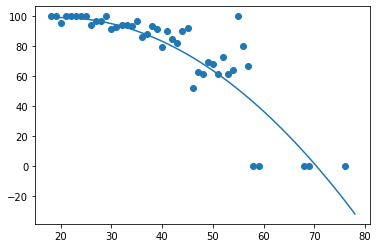

the r^2 of the model for 2008 is: 0.765387




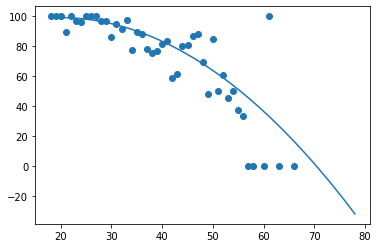

the r^2 of the model for 2009 is: 0.677776




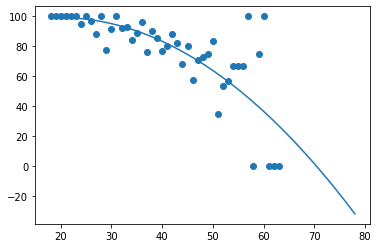

the r^2 of the model for 2010 is: 0.552213




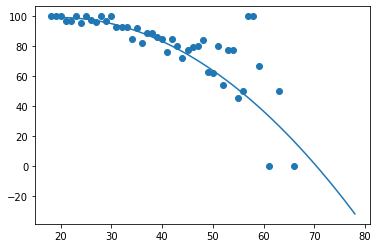

the r^2 of the model for 2011 is: 0.530893




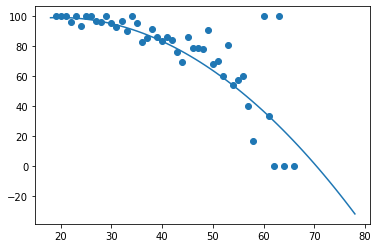

the r^2 of the model for 2012 is: 0.6048




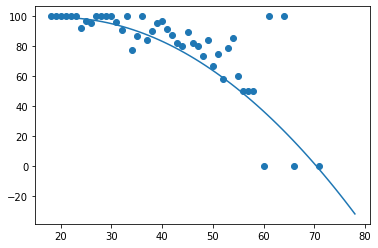

the r^2 of the model for 2013 is: 0.492651




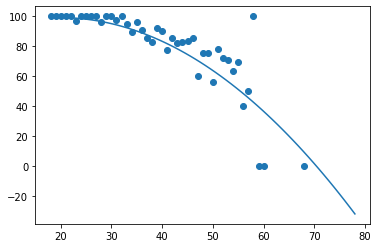

the r^2 of the model for 2014 is: 0.722112




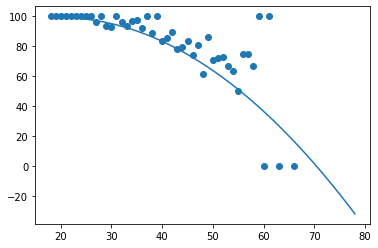

the r^2 of the model for 2015 is: 0.506443




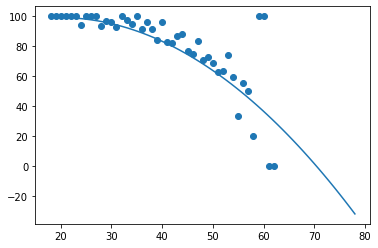

the r^2 of the model for 2016 is: 0.590374




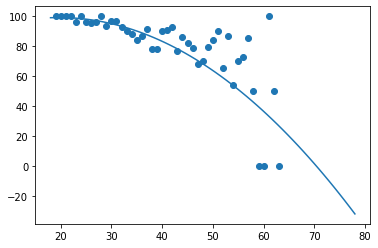

the r^2 of the model for 2017 is: 0.494157




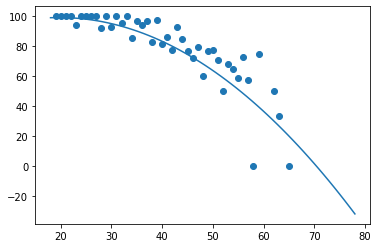

the r^2 of the model for 2018 is: 0.745006




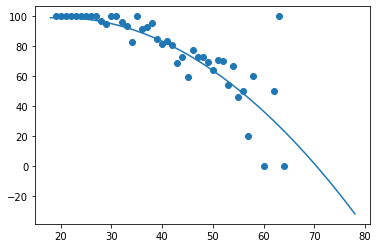

the r^2 of the model for 2019 is: 0.655073




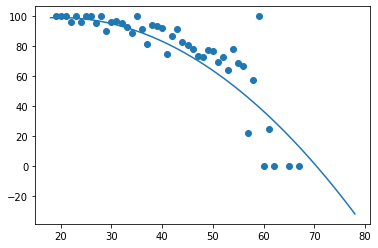

the r^2 of the model for 2020 is: 0.743596




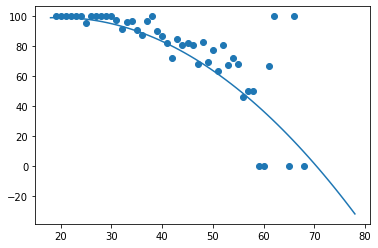

the r^2 of the model for 2021 is: 0.490567




In [32]:
# iterate through yearly_df_list and 1) create yearly_data_dict  2) sort dict  3) calculate r^2 and print
for j in range(len(yearly_df_list)):
    yearly_data_dict = make_fg_by_yard_dict(yearly_df_list[j])

    yearly_fg_perc_dict = {}
    for key in yearly_data_dict:
        attempts = yearly_data_dict[key][0]
        made = yearly_data_dict[key][1]
        yearly_fg_perc_dict[key] = round(100*made/attempts, 2)

    yearly_sorted_fg_perc_dict = dict(sorted(yearly_fg_perc_dict.items(), key=lambda item: item[0]))

    yearly_keys_list = list(yearly_sorted_fg_perc_dict.keys())
    yearly_values_list = list(yearly_sorted_fg_perc_dict.values())
    
    polyline = np.linspace(18, 78, 60)
    plt.scatter(yearly_keys_list, yearly_values_list)
    plt.plot(polyline, model(polyline))
    plt.show()

    r_squared = r2_score(yearly_values_list, model(yearly_keys_list))
    year = 1999 + j
    print(f"the r^2 of the model for {year} is: {round(r_squared, 6)}")
    print()
    print()

### Fit make percentage with quadratic with only kicks of 59 yards of less 

         2
-0.0345 x + 1.309 x + 86.44


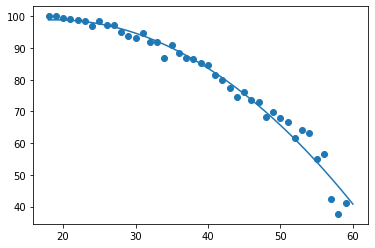

In [39]:
stop = 1000
for i in range(len(keys_list)):
    if((keys_list[i] > 59) and (stop == 1000)):
        stop = i
        break

trimmed_keys_list = keys_list[:stop]
trimmed_values_list = values_list[:stop]

#polynomial fit with degree = 2
trimmed_model = np.poly1d(np.polyfit(trimmed_keys_list, trimmed_values_list, 2))
print(trimmed_model)

#add fitted polynomial line to scatterplot
polyline2 = np.linspace(18, 60)
plt.scatter(trimmed_keys_list, trimmed_values_list)
plt.plot(polyline2, trimmed_model(polyline2))
plt.show()

In [40]:
# (y_true, y_pred)
r_squared = r2_score(trimmed_values_list, trimmed_model(trimmed_keys_list))
round(r_squared, 6)

0.976396

### test trimmed model vs each individual year

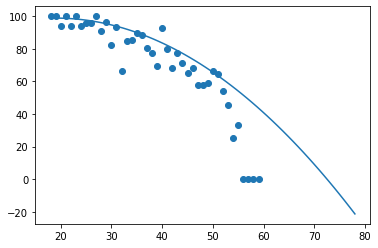

the r^2 of the trimmed model for 1999 is: 0.716265




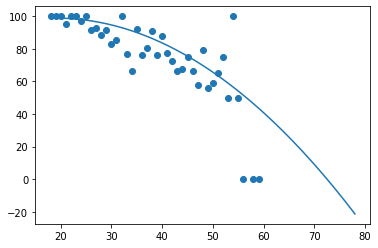

the r^2 of the trimmed model for 2000 is: 0.639991




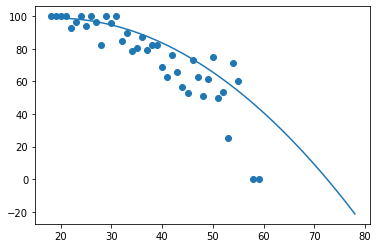

the r^2 of the trimmed model for 2001 is: 0.749822




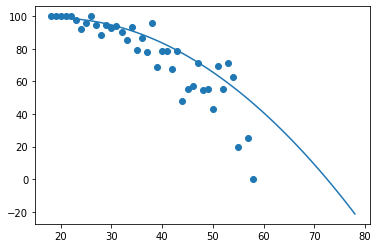

the r^2 of the trimmed model for 2002 is: 0.710471




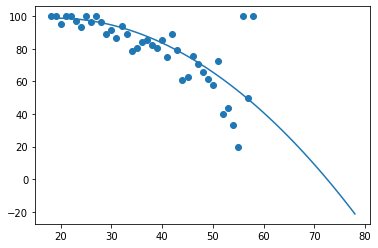

the r^2 of the trimmed model for 2003 is: 0.543118




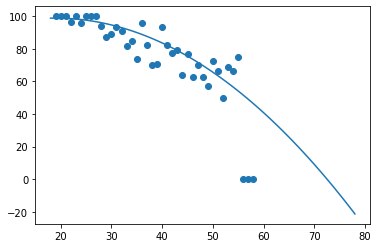

the r^2 of the trimmed model for 2004 is: 0.709893




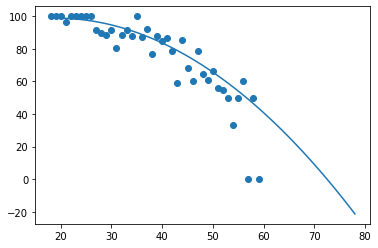

the r^2 of the trimmed model for 2005 is: 0.782435




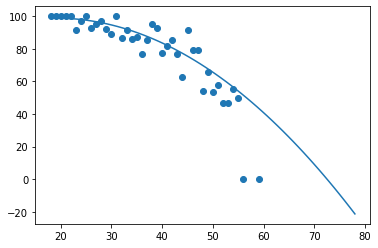

the r^2 of the trimmed model for 2006 is: 0.659921




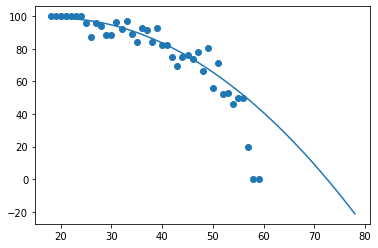

the r^2 of the trimmed model for 2007 is: 0.840392




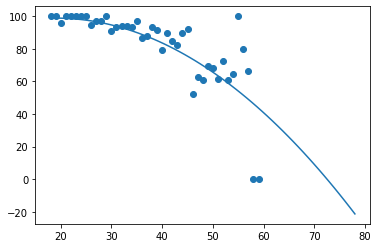

the r^2 of the trimmed model for 2008 is: 0.765387




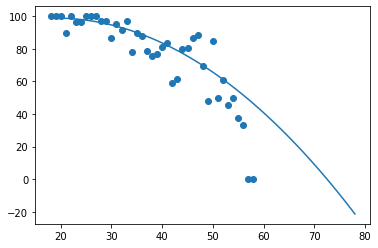

the r^2 of the trimmed model for 2009 is: 0.677776




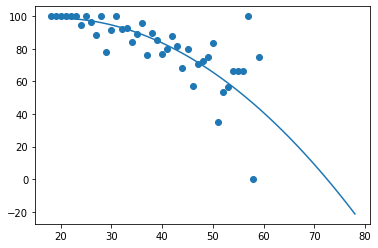

the r^2 of the trimmed model for 2010 is: 0.552213




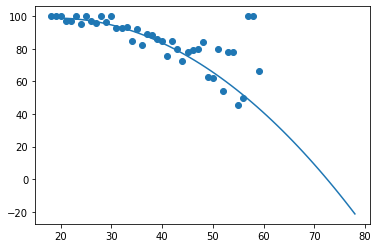

the r^2 of the trimmed model for 2011 is: 0.530893




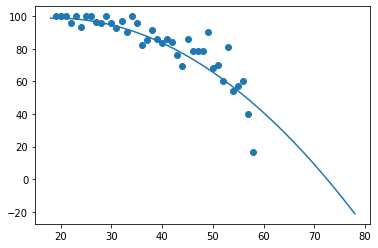

the r^2 of the trimmed model for 2012 is: 0.6048




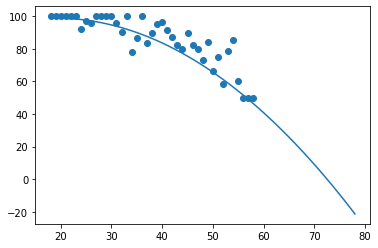

the r^2 of the trimmed model for 2013 is: 0.492651




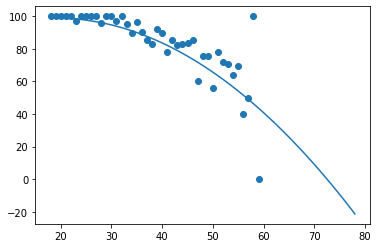

the r^2 of the trimmed model for 2014 is: 0.722112




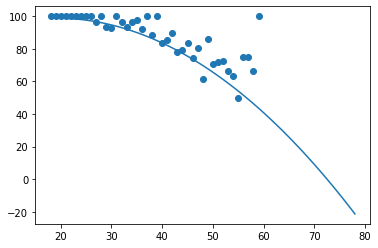

the r^2 of the trimmed model for 2015 is: 0.506443




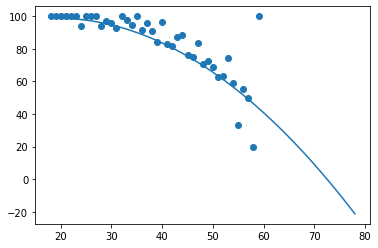

the r^2 of the trimmed model for 2016 is: 0.590374




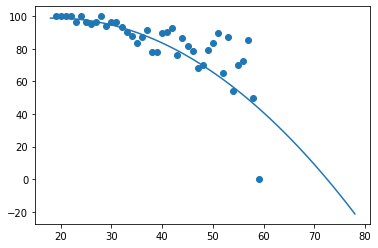

the r^2 of the trimmed model for 2017 is: 0.494157




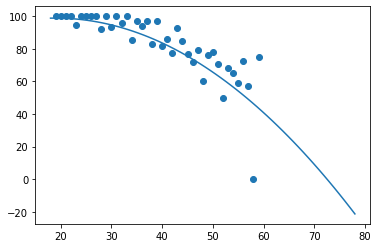

the r^2 of the trimmed model for 2018 is: 0.745006




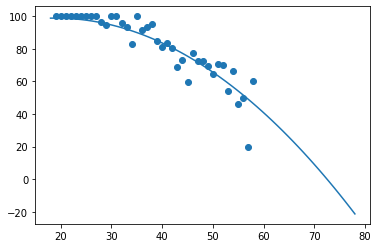

the r^2 of the trimmed model for 2019 is: 0.655073




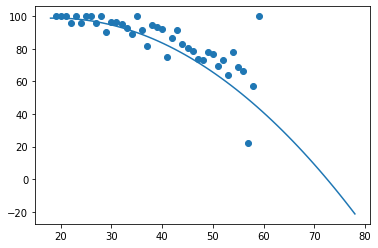

the r^2 of the trimmed model for 2020 is: 0.743596




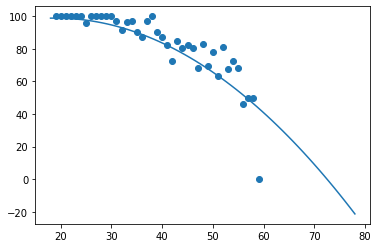

the r^2 of the trimmed model for 2021 is: 0.490567




In [41]:
for j in range(len(yearly_df_list)):
    yearly_data_dict = make_fg_by_yard_dict(yearly_df_list[j])

    yearly_fg_perc_dict = {}
    for key in yearly_data_dict:
        attempts = yearly_data_dict[key][0]
        made = yearly_data_dict[key][1]
        yearly_fg_perc_dict[key] = round(100*made/attempts, 2)

    yearly_sorted_fg_perc_dict = dict(sorted(yearly_fg_perc_dict.items(), key=lambda item: item[0]))  
    yearly_keys_list = list(yearly_sorted_fg_perc_dict.keys())
    yearly_values_list = list(yearly_sorted_fg_perc_dict.values())
    
    stop = 1000
    for i in range(len(yearly_keys_list)):
        if((yearly_keys_list[i] > 59) and (stop == 1000)):
            stop = i
            break

    trimmed_keys_list = yearly_keys_list[:stop]
    trimmed_values_list = yearly_values_list[:stop]
    
    polyline = np.linspace(18, 78, 60)
    plt.scatter(trimmed_keys_list, trimmed_values_list)
    plt.plot(polyline, trimmed_model(polyline))
    plt.show()

    r_squared = r2_score(yearly_values_list, model(yearly_keys_list))
    year = 1999 + j
    print(f"the r^2 of the trimmed model for {year} is: {round(r_squared, 6)}")
    print()
    print()

### Fit make percentage with quadratic with only kicks of 54 yards of less 

          2
-0.02261 x + 0.5142 x + 98.6


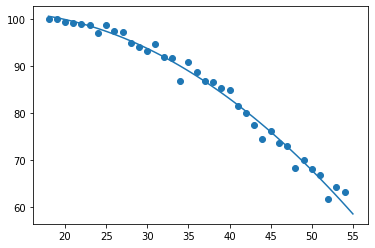

In [44]:
stop = 1000
for i in range(len(keys_list)):
    if((keys_list[i] > 54) and (stop == 1000)):
        stop = i
        break

trimmed_keys_list2 = keys_list[:stop]
trimmed_values_list2 = values_list[:stop]

#polynomial fit with degree = 2
trimmed_model2 = np.poly1d(np.polyfit(trimmed_keys_list2, trimmed_values_list2, 2))
print(trimmed_model2)

#add fitted polynomial line to scatterplot
polyline3 = np.linspace(18, 55)
plt.scatter(trimmed_keys_list2, trimmed_values_list2)
plt.plot(polyline3, trimmed_model2(polyline3))
plt.show()

In [45]:
r_squared3 = r2_score(trimmed_values_list2, trimmed_model2(trimmed_keys_list2))
round(r_squared3, 6)

0.987543

### Test vs each individual year

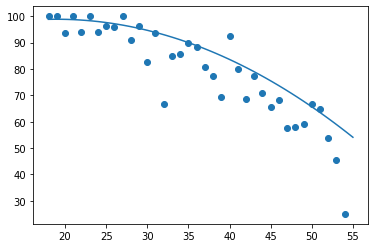

the r^2 of the trimmed model for 1999 is: 0.716265




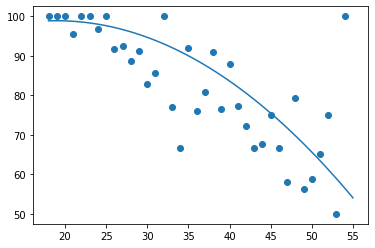

the r^2 of the trimmed model for 2000 is: 0.639991




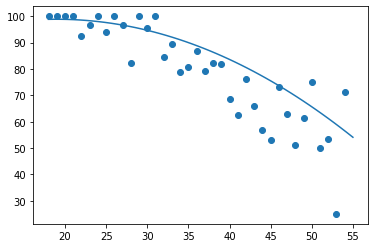

the r^2 of the trimmed model for 2001 is: 0.749822




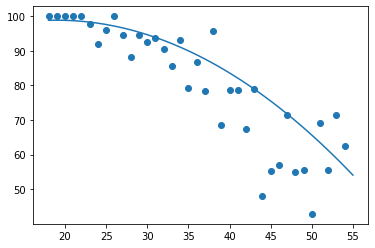

the r^2 of the trimmed model for 2002 is: 0.710471




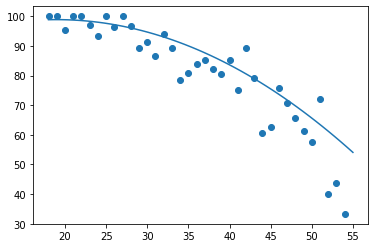

the r^2 of the trimmed model for 2003 is: 0.543118




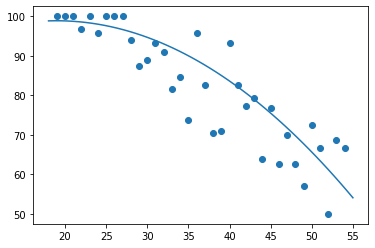

the r^2 of the trimmed model for 2004 is: 0.709893




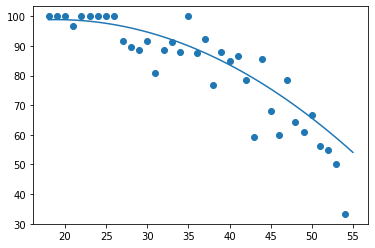

the r^2 of the trimmed model for 2005 is: 0.782435




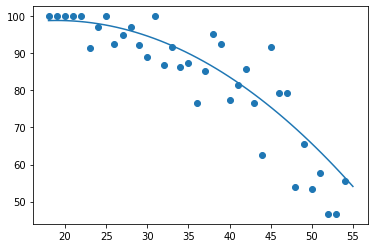

the r^2 of the trimmed model for 2006 is: 0.659921




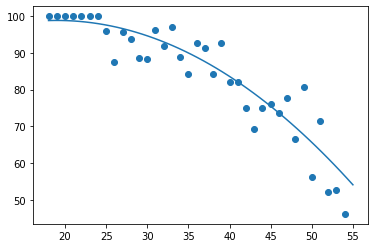

the r^2 of the trimmed model for 2007 is: 0.840392




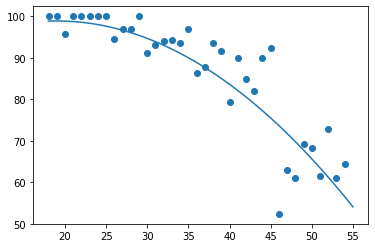

the r^2 of the trimmed model for 2008 is: 0.765387




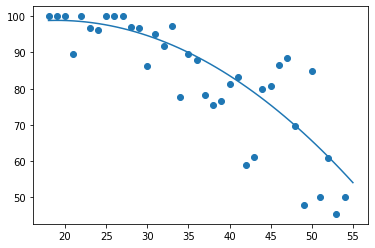

the r^2 of the trimmed model for 2009 is: 0.677776




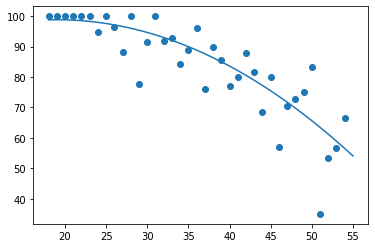

the r^2 of the trimmed model for 2010 is: 0.552213




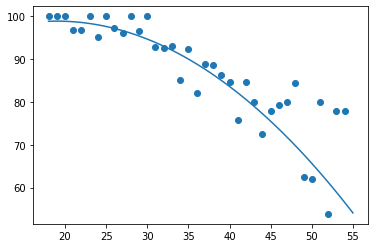

the r^2 of the trimmed model for 2011 is: 0.530893




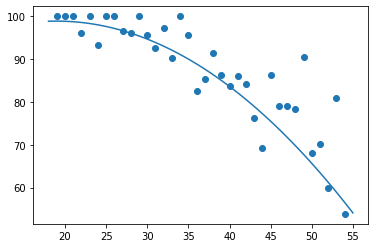

the r^2 of the trimmed model for 2012 is: 0.6048




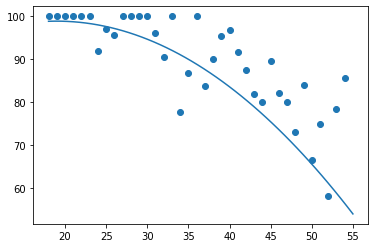

the r^2 of the trimmed model for 2013 is: 0.492651




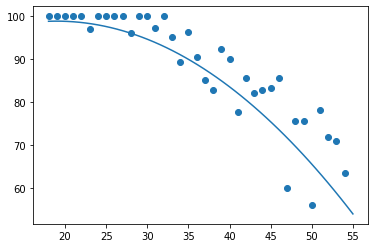

the r^2 of the trimmed model for 2014 is: 0.722112




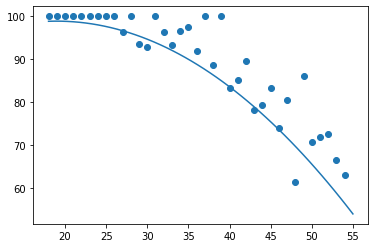

the r^2 of the trimmed model for 2015 is: 0.506443




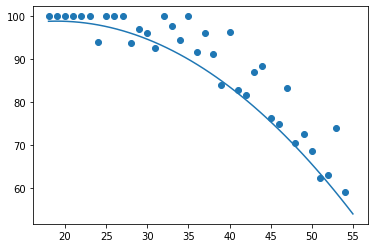

the r^2 of the trimmed model for 2016 is: 0.590374




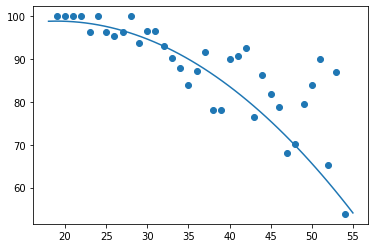

the r^2 of the trimmed model for 2017 is: 0.494157




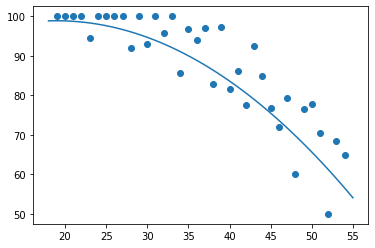

the r^2 of the trimmed model for 2018 is: 0.745006




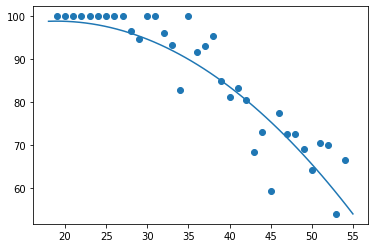

the r^2 of the trimmed model for 2019 is: 0.655073




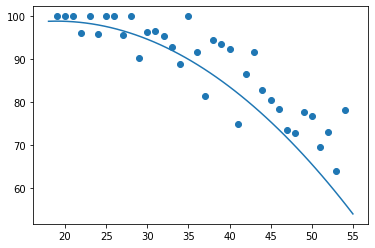

the r^2 of the trimmed model for 2020 is: 0.743596




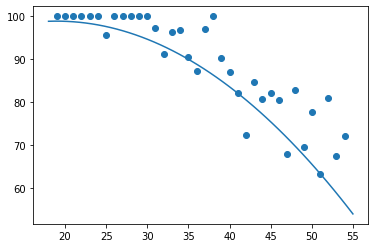

the r^2 of the trimmed model for 2021 is: 0.490567




In [46]:
for j in range(len(yearly_df_list)):
    yearly_data_dict = make_fg_by_yard_dict(yearly_df_list[j])

    yearly_fg_perc_dict = {}
    for key in yearly_data_dict:
        attempts = yearly_data_dict[key][0]
        made = yearly_data_dict[key][1]
        yearly_fg_perc_dict[key] = round(100*made/attempts, 2)

    yearly_sorted_fg_perc_dict = dict(sorted(yearly_fg_perc_dict.items(), key=lambda item: item[0]))  
    yearly_keys_list = list(yearly_sorted_fg_perc_dict.keys())
    yearly_values_list = list(yearly_sorted_fg_perc_dict.values())
    
    stop = 1000
    for i in range(len(yearly_keys_list)):
        if((yearly_keys_list[i] > 54) and (stop == 1000)):
            stop = i
            break

    trimmed_keys_list = yearly_keys_list[:stop]
    trimmed_values_list = yearly_values_list[:stop]
    
    polyline = np.linspace(18, 55)
    plt.scatter(trimmed_keys_list, trimmed_values_list)
    plt.plot(polyline, trimmed_model(polyline))
    plt.show()

    r_squared = r2_score(yearly_values_list, model(yearly_keys_list))
    year = 1999 + j
    print(f"the r^2 of the trimmed model for {year} is: {round(r_squared, 6)}")
    print()
    print()

# Make a bet for each kick and see which teams/kickers would have made money

### Use historical results to create odds

In [ ]:
def team_ave_vs_league_ave(fg_dict, df):  
    # Use data dictionary to create new dictionary with key being fg distance, value being payout
    payout_dict = {}
    for elem in fg_dict:
        made = fg_dict[elem][1]
        missed = fg_dict[elem][0] - made
        wager = 10
        if(made > 0): # only have payouts for 
            payout = (missed/made)*wager
            payout_dict[elem] = payout   
    
    # create a dictionary of all teams where the value will be the team's betting profits/losses
    teams = list(df["team"].unique())
    team_dict = {}
    for i in range(len(teams)):
        team_dict[teams[i]] = 0
   
   # go through each row and make bets for each kick and add/subtract total from team's total
    for row in range(len(df)):
        # access list of made kicks
        made_kicks = df.loc[row, "fg_made_list"]  
        # if list is not empty
        if(str(df.loc[row, "fg_made_list"]) != "nan"):
            team = df.loc[row, "team"]
            for j in range(len(made_kicks)):
                team_dict[team] += payout_dict[int(made_kicks[j])]
    
        # access list of missed kicks
        missed_kicks = df.loc[row, "fg_missed_list"]  
        # if list is not empty
        if(str(df.loc[row, "fg_missed_list"]) != "nan"):
            team = df.loc[row, "team"]
            for j in range(len(missed_kicks)):
                team_dict[team] -= wager
            
    # round winnings
    for key in team_dict:
        team_dict[key] = round(team_dict[key], 2) 
        
    return(team_dict)

In [ ]:
betting_dict = team_ave_vs_league_ave(data_dict, df)
sorted_betting_dict = dict(sorted(betting_dict.items(), key=lambda item: item[1], reverse=True))
sorted_betting_dict

In [ ]:
plt.bar(x=list(sorted_betting_dict.keys()), height=list(sorted_betting_dict.values()))
plt.xticks(rotation=45, fontsize=7)
None

### Use first model to create payouts

### Use seconds model to create payouts

# Make a bet for each kick and see which kickers would have made money

### Use historic data to create odds

In [ ]:
def player_ave_vs_league_ave(fg_dict, df):  
    # Use data dictionary to create new dictionary with key being fg distance, value being payout
    payout_dict = {}
    for elem in fg_dict:
        made = fg_dict[elem][1]
        missed = fg_dict[elem][0] - made
        wager = 10
        if(made > 0): # only have payouts for 
            payout = (missed/made)*wager
            payout_dict[elem] = payout
    
    # create a dictionary of all teams where the value will be the team's betting profits/losses
    kickers = list(df["player_name"].unique())
    kickers_dict = {}
    for i in range(len(kickers)):
        if(str(kickers[i]) != "nan"):
            kickers_dict[kickers[i]] = 0
    
   
   # go through each row and make bets for each kick and add/subtract total from team's total
    for row in range(len(df)):
        # access list of made kicks
        made_kicks = df.loc[row, "fg_made_list"]  
        # if list is not empty
        if(str(df.loc[row, "fg_made_list"]) != "nan"):
            player = df.loc[row, "player_name"]
            for j in range(len(made_kicks)):
                kickers_dict[player] += payout_dict[int(made_kicks[j])]
    
        # access list of missed kicks
        missed_kicks = df.loc[row, "fg_missed_list"]  
        # if list is not empty
        if(str(df.loc[row, "fg_missed_list"]) != "nan"):
            player = df.loc[row, "player_name"]
            for j in range(len(missed_kicks)):
                kickers_dict[player] -= wager
            
    # round winnings
    for key in kickers_dict:
        kickers_dict[key] = round(kickers_dict[key], 2) 
        
    return(kickers_dict)

In [ ]:
player_betting_dict = player_ave_vs_league_ave(data_dict, df)
sorted_player_betting_dict = dict(sorted(player_betting_dict.items(), key=lambda item: item[1], reverse=True))
sorted_player_betting_dict

In [ ]:
plt.bar(x=list(sorted_player_betting_dict.keys()), height=list(sorted_player_betting_dict.values()))
None

### Divide winnings/losses by number of games played

In [ ]:
player_betting_dict_per_game = {}
for player in player_betting_dict.keys():
    games = len(df[df["player_name"] == player])
    player_betting_dict_per_game[player] = round(player_betting_dict[player]/games, 2)

sorted_player_betting_dict_per_game = dict(sorted(player_betting_dict_per_game.items(), key=lambda item: item[1], reverse=True))
sorted_player_betting_dict_per_game

#### Filter games by 16+

In [ ]:
filtered_player_betting_dict_per_game = {}
for player in player_betting_dict.keys():
    games = len(df[df["player_name"] == player])
    if(games > 15):
        filtered_player_betting_dict_per_game[player] = round(player_betting_dict[player]/games, 2)

sorted_filtered_player_betting_dict_per_game = dict(sorted(filtered_player_betting_dict_per_game.items(), key=lambda item: item[1], reverse=True))
sorted_filtered_player_betting_dict_per_game

### Divide winnings/losses by nunber of kicks

In [ ]:
player_betting_dict_per_kick = {}
for player in player_betting_dict.keys():
    player_df = df[df["player_name"] == player]
    player_df.reset_index(drop=False, inplace=True)
    #print(f"Length of player df: {len(player_df)}")
    kicks = 0
    for i in range(len(player_df)):
        made = len(player_df.loc[i, "fg_made_list"])
        missed = len(player_df.loc[i, "fg_missed_list"])
        kicks += made + missed
    
    if(kicks > 10):
        player_betting_dict_per_kick[player] = round(player_betting_dict[player]/kicks, 2)

sorted_player_betting_dict_per_kick = dict(sorted(player_betting_dict_per_kick.items(), key=lambda item: item[1], reverse=True))
sorted_player_betting_dict_per_kick